In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st
from scipy import special as sp

Mean =  1.0103127533197653
stdev =  0.0014530426725836824


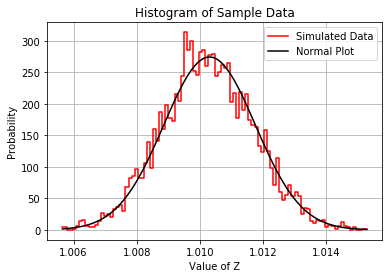

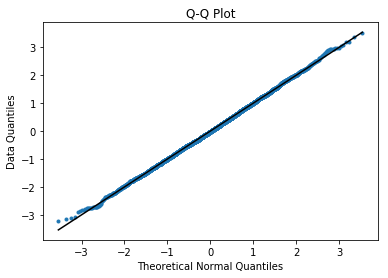

In [2]:
# Q-Q Plot Definition
def QQplot(data, **kwargs):
    mean = kwargs.get('mean', np.mean(data))
    std = kwargs.get('std', math.sqrt(np.mean((data-np.mean(data))**2)))
    datalbl = kwargs.get('lbl', "Data")
    data.sort()
    Z = (data-mean)/std
    n = len(data)
    L = np.arange(1,n + 1,1) / (n + 1)
    Qnorm = math.sqrt(2)*sp.erfinv(2*L-1)
    MaxZ = max(abs(Z))
    MaxQ = max(abs(Qnorm))
    Max = max(MaxZ, MaxQ)
    plt.scatter(Qnorm, Z, marker = ".")
    plt.plot([-Max, Max],[-Max, Max], color = "black")
    plt.title("Q-Q Plot")
    plt.xlabel("Theoretical Normal Quantiles")
    plt.ylabel(datalbl + " Quantiles")
    plt.show()

#parameters for X and Y
meanP = 10
sdP = 1
meanQ = 10
sdQ = 1
k = 0

N = 10000

k1 = 5000
count = 0
smpl_mean = []

while (count < k1):
    np.random.seed((k1+1)*count)
    #Z=X/Y
    Pdata = np.random.normal(meanP,sdP,N)
    Qdata = np.random.normal(meanQ,sdQ,N)
    Zdata = (Qdata) / (Pdata-k*Qdata)
    smpl_mean.append(np.mean(Zdata))
    count += 1

mean_smpl_mean = np.mean(smpl_mean)
stdev_smpl_mean = np.sqrt(np.mean((smpl_mean-mean_smpl_mean)**2))

print("Mean = ", mean_smpl_mean)
print("stdev = ", stdev_smpl_mean)

density = True
bins = 100
hist, bin_edges = np.histogram(smpl_mean, bins, density=density)

f = (1/(stdev_smpl_mean*np.sqrt(2*np.pi)))*np.exp(-(bin_edges[0:-1]-mean_smpl_mean)*(bin_edges[0:-1]-mean_smpl_mean)/(2*(stdev_smpl_mean*stdev_smpl_mean)))

plt.figure()
plt.plot(bin_edges[0:-1], (hist), drawstyle = "steps-mid", color="red", label = "Simulated Data")
plt.plot(bin_edges[0:-1], f, color="black", label = "Normal Plot")
plt.title("Histogram of Sample Data")
plt.xlabel("Value of Z")
plt.ylabel("Probability")
plt.grid()
plt.legend()
plt.show()

QQplot(smpl_mean)

#st.shapiro(smpl_mean)